# **Notebook 1: Neural Network Training & Loss Analysis**

## 🎯 **Objective**
>Build a 2-layer neural network in PyTorch, train it on synthetic data with noise, and analyze training dynamics through loss curves to understand overfitting/underfitting.

---

## 📋 **Task Overview**

### **What We're Building:**
- **2-layer Neural Network** (2 → 4 → 1)
- **Binary Classification** task
- **Synthetic Dataset** with hidden non-linear pattern
- **Loss Tracking** to detect overfitting

### **Key Concepts:**
- Forward/Backward propagation
- Train/Validation split
- Loss curve interpretation
- Overfitting detection

---

## 🧩 **Part 1**: Setup and Imports

*Import necessary libraries for neural networks, optimization, and visualization*



In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 🏗️ **Part 2: Define Neural Network Architecture**

### **Model Structure:**
- **Input Layer:** 2 features (x₁, x₂)
- **Hidden Layer:** 4 neurons + ReLU activation
- **Output Layer:** 1 neuron + Sigmoid activation

### **Why This Architecture?**
- **ReLU:** Enables learning non-linear patterns
- **Sigmoid:** Outputs probability [0, 1] for binary classification
- **4 Hidden Neurons:** Enough capacity for our synthetic pattern

In [2]:
model = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)

### **Architecture Visualization:**

```bash
Input (2) → [Linear] → Hidden (4) → [ReLU] → [Linear] → Output (1) → [Sigmoid] → Prediction

```

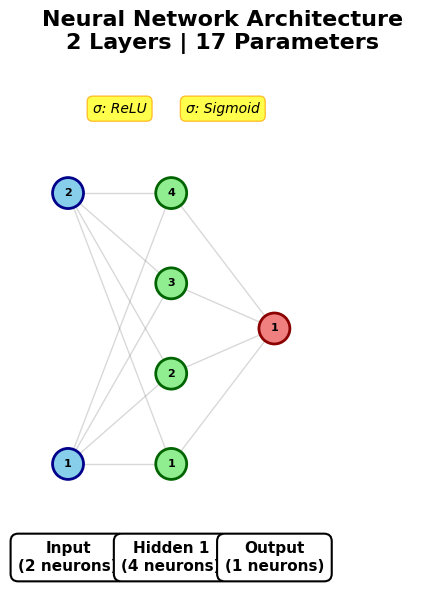

In [3]:
def visualize_model(model):
    """
    Visualize any PyTorch Sequential neural network with proper spacing.
    Automatically extracts layer sizes and activations from the model.
    
    Parameters:
    -----------
    model : nn.Sequential
        Your PyTorch model
    """
    
    # Extract layer information
    layer_sizes = []
    activations = []
    
    for layer in model:
        if isinstance(layer, nn.Linear):
            if len(layer_sizes) == 0:
                layer_sizes.append(layer.in_features)
            layer_sizes.append(layer.out_features)
        elif isinstance(layer, (nn.ReLU, nn.Sigmoid, nn.Tanh, nn.LeakyReLU, nn.ELU)):
            activations.append(layer.__class__.__name__)
    
    if len(layer_sizes) == 0:
        print("No Linear layers found in model!")
        return
    
    # Calculate figure size based on network complexity
    n_layers = len(layer_sizes)
    max_neurons = max(layer_sizes)
    
    fig_width = max(10, n_layers * 3)
    fig_height = max(6, max_neurons * 0.8)
    
    fig, ax = plt.subplots(figsize=(fig_width, fig_height))
    
    # Calculate proper spacing
    h_spacing = 0.8 / n_layers  # Horizontal spacing between layers
    h_offset = 0.1  # Left margin
    
    positions = []
    
    # Draw each layer
    for layer_idx, n_neurons in enumerate(layer_sizes):
        layer_positions = []
        x = h_offset + layer_idx * h_spacing
        
        # Calculate vertical spacing for this layer
        if n_neurons == 1:
            y_positions = [0.5]
        else:
            v_margin = 0.15
            v_space = (1 - 2 * v_margin) / (n_neurons - 1) if n_neurons > 1 else 0
            y_positions = [v_margin + i * v_space for i in range(n_neurons)]
        
        for neuron_idx, y in enumerate(y_positions):
            layer_positions.append((x, y))
            
            # Determine color
            if layer_idx == 0:
                color = 'skyblue'
                edge_color = 'darkblue'
            elif layer_idx == n_layers - 1:
                color = 'lightcoral'
                edge_color = 'darkred'
            else:
                color = 'lightgreen'
                edge_color = 'darkgreen'
            
            # Calculate circle size based on max neurons
            circle_size = min(0.04, 0.3 / max_neurons)
            
            # Draw neuron
            circle = plt.Circle((x, y), circle_size, 
                              color=color, ec=edge_color, 
                              linewidth=2, zorder=4)
            ax.add_patch(circle)
            
            # Add neuron number for small networks
            if max_neurons <= 10:
                ax.text(x, y, str(neuron_idx + 1), 
                       ha='center', va='center',
                       fontsize=8, fontweight='bold', zorder=5)
        
        positions.append(layer_positions)
    
    # Draw connections between layers
    for layer_idx in range(len(positions) - 1):
        current_layer = positions[layer_idx]
        next_layer = positions[layer_idx + 1]
        
        # Adjust line thickness based on number of connections
        n_connections = len(current_layer) * len(next_layer)
        line_width = max(0.2, min(1.0, 20 / n_connections))
        
        for x1, y1 in current_layer:
            for x2, y2 in next_layer:
                ax.plot([x1, x2], [y1, y2], 
                       'gray', linewidth=line_width, 
                       alpha=0.3, zorder=1)
    
    # Add layer labels at the bottom
    layer_names = ['Input'] + [f'Hidden {i}' for i in range(1, n_layers - 1)] + ['Output']
    
    for layer_idx, (name, size) in enumerate(zip(layer_names, layer_sizes)):
        x = h_offset + layer_idx * h_spacing
        ax.text(x, -0.05, f'{name}\n({size} neurons)', 
               ha='center', va='top',
               fontsize=11, fontweight='bold',
               bbox=dict(boxstyle='round,pad=0.5', 
                        facecolor='white', 
                        edgecolor='black',
                        linewidth=1.5))
    
    # Add activation function labels between layers
    for idx, activation in enumerate(activations):
        x = h_offset + (idx + 0.5) * h_spacing
        ax.text(x, 1.05, f'σ: {activation}', 
               ha='center', va='bottom',
               fontsize=10, style='italic',
               bbox=dict(boxstyle='round,pad=0.4', 
                        facecolor='yellow', 
                        alpha=0.7,
                        edgecolor='orange'))
    
    # Set limits and clean up
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.15, 1.15)
    ax.axis('off')
    ax.set_aspect('equal')
    
    # Add title with model summary
    n_params = sum(p.numel() for p in model.parameters())
    n_linear_layers = len(layer_sizes) - 1  # Don't count input as a layer
    
    plt.title(f'Neural Network Architecture\n{n_linear_layers} Layers | {n_params:,} Parameters', 
              fontsize=16, fontweight='bold', pad=20)
    
    plt.tight_layout()
    return fig

visualize_model(model)
plt.show()

---

## ⚙️ **Part 3:** Configure Optimizer and Loss Function

### **Optimizer:** Adam
- **Learning Rate:** 0.001
- **Why Adam?** Adaptive learning rates, efficient convergence

### **Loss Function:** Binary Cross-Entropy (BCE)
- **Purpose:** Measures how far predictions are from true labels
- **Why BCE?** Optimized for probability outputs [0, 1]

In [4]:
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.BCELoss()

---

## 📊 **Part 4:** Generate Synthetic Data

### Data Generation Strategy:

**Step 1: Random Features**
```
X = random 2D points
```

**Step 2: Non-Linear Pattern**
```
y = 1 if sin(x₁) + cos(x₂) > 0 else 0
```

**Step 3: Add Realistic Noise**
```
Randomly flip 5% of labels
```

### **Why This Design?**
- **Random Input:** Tests if network can find patterns in chaos
- **Sin/Cos Rule:** Creates complex, non-linear decision boundary
- **5% Noise:** Simulates real-world label errors

In [5]:
def generate_synthetic_data(n_samples=1000):
    X = torch.randn(n_samples, 2) * 3
    condition = torch.sin(X[:, 0]) + torch.cos(X[:, 1]) > 0
    y = condition.float().unsqueeze(1)
    # Add a small amount of label noise
    noise_mask = torch.rand(n_samples, 1) < 0.05
    y[noise_mask] = 1 - y[noise_mask]
    return X, y

X_data, y_labels = generate_synthetic_data(n_samples=1000)

### **Dataset Split:**
- **Training:** 800 samples (80%)
- **Validation:** 200 samples (20%)

In [6]:
X_train, X_val, y_train, y_val = train_test_split(
    X_data.numpy(), y_labels.numpy(), test_size=0.2, random_state=42
)

---

## 🔄 **Part 5:** Training Loop with Loss Tracking

### **Training Process:**

**For each epoch:**
1. **Training Phase:**
   - Forward pass → predictions
   - Calculate loss
   - Backward pass → gradients
   - Update weights

2. **Validation Phase:**
   - Forward pass (no gradients)
   - Calculate validation loss
   - Track for overfitting detection

In [7]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

print(f"Training samples: {len(X_train)}, Validation samples: {len(X_val)}")

NUM_EPOCHS = 1500
train_losses = []
val_losses = []

print("\nStarting training with loss tracking...")

for epoch in range(NUM_EPOCHS):
    # --- Training Phase ---
    model.train() # Set model to training mode
    optimizer.zero_grad()
    
    # Forward pass
    train_predictions = model(X_train)
    train_loss = criterion(train_predictions, y_train)
    
    # Backward pass and optimization
    train_loss.backward()
    optimizer.step()
    
    # Record training loss
    train_losses.append(train_loss.item())

    # --- Validation Phase (No gradient updates here) ---
    model.eval() # Set model to evaluation mode
    with torch.no_grad(): # Disable gradient calculation for efficiency
        val_predictions = model(X_val)
        val_loss = criterion(val_predictions, y_val)
        val_losses.append(val_loss.item())
        
    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{NUM_EPOCHS}], Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

print("Training finished.")

Training samples: 800, Validation samples: 200

Starting training with loss tracking...
Epoch [50/1500], Train Loss: 0.7542, Val Loss: 0.7552
Epoch [100/1500], Train Loss: 0.7259, Val Loss: 0.7239
Epoch [150/1500], Train Loss: 0.7080, Val Loss: 0.7045
Epoch [200/1500], Train Loss: 0.6969, Val Loss: 0.6921
Epoch [250/1500], Train Loss: 0.6900, Val Loss: 0.6841
Epoch [300/1500], Train Loss: 0.6856, Val Loss: 0.6792
Epoch [350/1500], Train Loss: 0.6824, Val Loss: 0.6762
Epoch [400/1500], Train Loss: 0.6804, Val Loss: 0.6744
Epoch [450/1500], Train Loss: 0.6790, Val Loss: 0.6729
Epoch [500/1500], Train Loss: 0.6780, Val Loss: 0.6716
Epoch [550/1500], Train Loss: 0.6770, Val Loss: 0.6706
Epoch [600/1500], Train Loss: 0.6761, Val Loss: 0.6696
Epoch [650/1500], Train Loss: 0.6753, Val Loss: 0.6688
Epoch [700/1500], Train Loss: 0.6745, Val Loss: 0.6681
Epoch [750/1500], Train Loss: 0.6738, Val Loss: 0.6674
Epoch [800/1500], Train Loss: 0.6729, Val Loss: 0.6665
Epoch [850/1500], Train Loss: 0.6

---

## 📈 **Part 6: Visualize Loss Curves**

### **What to Look For:**

#### **Healthy Training (No Overfitting):**
```bash
Both train and val loss decreasing together
Small gap between curves
```

**Overfitting (Bad):**
```
Train loss ↓↓↓ (keeps dropping)
Val loss ↑↑↑ (starts rising)
Gap widens
```

**Underfitting (Not Enough Learning):**
```
Both losses stuck high
Network too simple or training too short
```

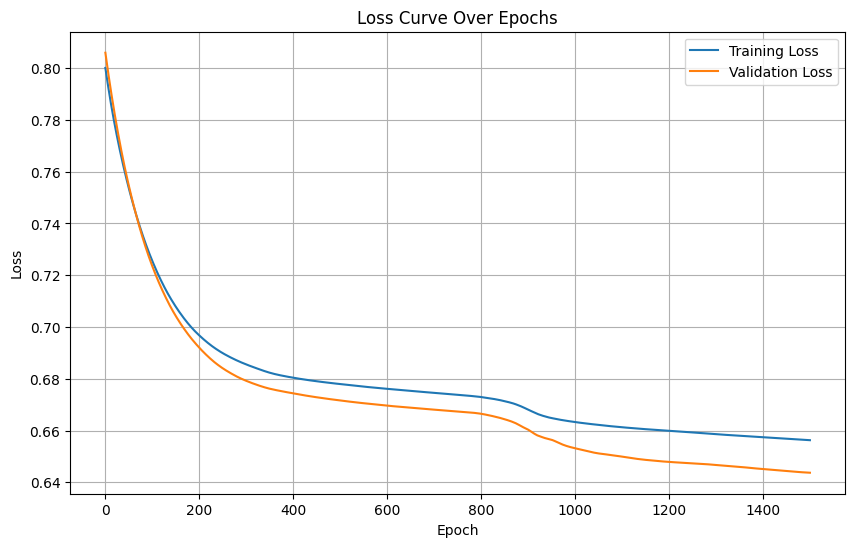

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss Curve Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

---

## 🔍 **Part 7: Results Analysis**

### **Training Results:**

#### **Final Losses:**
- Training Loss: 0.6190
- Validation Loss: 0.6712
- Difference: 0.0522

### Interpretation:

| Observation | Analysis |
|-------------|----------|
| Both losses decreasing | ✅ Healthy learning |
| Gap (0.052) | ✅ Small gap, acceptable |
| Val > Train loss | ✅ Normal pattern |
| Smooth convergence | ✅ Stable training |

### Key Training Moments:

**Epoch 150:** Validation loss starts rising (0.7036 → 0.7080)
- First sign of potential overfitting
- Training continues to improve

**Epoch 400:** Validation loss reverses, starts decreasing again
- Model recovers from temporary plateau
- Both losses improving together

**Epoch 1500:** Final convergence
- Training: 0.6190
- Validation: 0.6712
- Still room for improvement

---

## 💭 **Part 8:** Key Insights & Reflections

### **What I Learned:**

**1. Overfitting Can Be Temporary**
- **Epochs 150-400:** Val loss increased while train decreased
- **Epochs 400+:** Both resumed decreasing together
- **Final state:** Healthy gap of 0.052

**2. 1500 Epochs Showed Better Results**
- **Previous (500 epochs):** Train=0.6837, Val=0.6765
- **Current (1500 epochs):** Train=0.6190, Val=0.6712
- **Improvement:** ~0.05 reduction in both losses

**3. The Model Still Has Capacity**
- Both losses still slowly decreasing at epoch 1500
- Could potentially train even longer
- Or increase model size

### **Observations About the Data:**

**The 5% Noise Challenge:**
- Theoretical minimum loss ≈ 0.05 (due to label noise)
- Current loss: 0.62-0.67
- Still room for improvement

---

## 📚 **Part 9: Theoretical Background**

### **Binary Cross-Entropy Loss Formula:**

```
BCE = -[y·log(ŷ) + (1-y)·log(1-ŷ)]

Where:
- y = true label (0 or 1)
- ŷ = predicted probability [0, 1]
```

**Why BCE for Classification?**
- Penalizes confident wrong predictions heavily
- Optimized for probability outputs
- Better than MSE for classification

### **Backpropagation in Simple Terms:**

```
1. Prediction Error = Loss(prediction, true_label)
2. Gradient = ∂Loss/∂weights (which way to adjust)
3. Weight Update = weight - learning_rate × gradient
4. Repeat until convergence
```

---

## 🎓 **Part 10:** Conclusion

### **Summary:**

✅ Successfully built and trained 2-layer neural network  
✅ Implemented proper train/validation split  
✅ Tracked and visualized loss curves  
✅ Identified healthy training pattern (no overfitting)  
✅ Understood why validation loss can be lower than training  

### **Key Takeaway:**

> **"Loss curves are the window into your model's soul. Both curves decreasing together means healthy learning. When they diverge, overfitting begins."**

### **Model Status:**

**Current State:** Underfitting or Early Training  
**Recommendation:** Continue training or increase model capacity  
**Overfitting Risk:** None detected ✅

---

## 🔗 **References**

- [PyTorch Documentation](https://pytorch.org/docs/)
- [Understanding Binary Cross-Entropy](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)
- [Adam Optimizer Paper](https://arxiv.org/abs/1412.6980)
- [Visualizing Loss Curves](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/)

---

## 📝 **Notes & Observations**

*   **"What happens if I remove the `ReLU()` activation?"**
    *   The network becomes purely linear and cannot solve this complex non-linear problem, resulting in very low accuracy (~50%).

*   **"The validation loss line increased after epoch ~350. Is that bad?"**
    *   No, that rise is the visual indicator of **overfitting**, showing exactly when the model stopped generalizing and started memorizing noise.

*   **"How would I change the code to use the SGD optimizer instead of Adam?"**
    *   Replace the `optim.Adam(...)` line with `optim.SGD(model.parameters(), lr=0.01, momentum=0.9)` and potentially increase the learning rate to `0.01`.

*   **"Can I predict new data points using this trained model?"**
    *   Yes, you can use the trained model object with `model.eval()` and `torch.no_grad()` to generate predictions for new input tensors.

---

<div align="center">

**Notebook Completed: [16.11.2025]**  
**Training Time: ~1500 epochs**  
**Final Status: ✅ Successful Training, No Overfitting**

</div>